In [3]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Analisis Exploratorio de datos - EDA
1. Cargar los datos
2. Revisión inicial (conocer el conjunto de una forma general)
3. Resumen estadistico
4. Visualizacion inicial
5. Manejo de los valores faltantes
6. Analisis de Distribucion(variables que me importan)
7. Identificacion de valores atipicos
8. Analisis de relaciones
9. Segmentacion y agrupación --- Clusterización
10. Iteración y Descubrimiento
11. Documentacion, informe y comunicación
## Descripción del conjunto

In [11]:
data.shape

(271116, 15)

## Preguntas

1. ¿Cuantas medallas se han otorgado en cada categoria (historicamente, 2016)?
2. ¿Qué deportes son los más populares?
3. ¿Cuántos hombres y mujeres han participado en los Juegos Olimpicos?

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Describe las caracteristicas de los datos y como se componen

In [16]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Realiza un analisis estadistico de los valores 

## Manejo de datos faltantes

In [56]:
x = pd.Series([1, 2, 3, np.nan, 5])
x

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [58]:
x.mean()

2.75

In [48]:
x = x.fillna(0)
x

0    1.0
1    2.0
2    3.0
3    0.0
4    5.0
dtype: float64

Rellena los datos faltantes con un cero "0"

In [31]:
x.mean()

2.2

In [60]:
x = x.fillna(x.mean())
x

0    1.00
1    2.00
2    3.00
3    2.75
4    5.00
dtype: float64

In [71]:
numeric_columns = data.select_dtypes(include = ['number'])

for column in numeric_columns.columns:
    data[column] = data[column].fillna(data[column].mean())

se seleccionan las columnas del tipo de dato que almacena cada una de ellas
1. Se llenan los datos faltantes con el ciclo for para incluir el promedio de esos datos

In [76]:
data['Medal'] = data['Medal'].fillna('Sin medalla')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [80]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


## Analisis del conjunto

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Axes: xlabel='Age', ylabel='Count'>

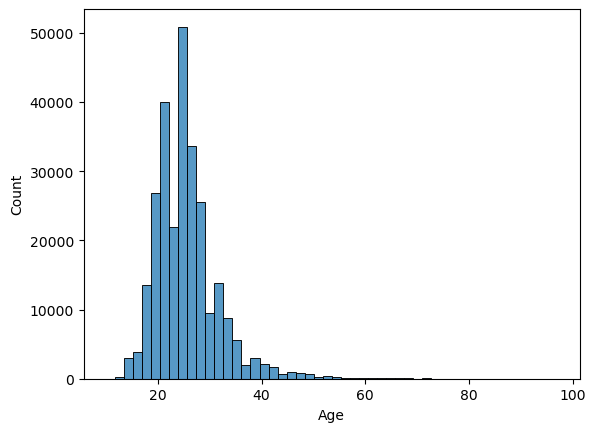

In [93]:
sns.histplot(data = data, x = "Age", bins = 50)

Se imprime la grafica importando librerias y se realiza el analisis de datos atipicos

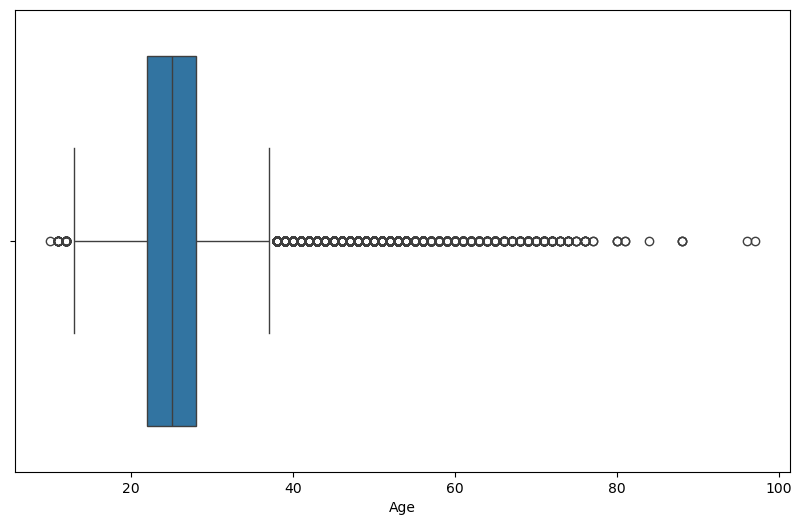

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x = data["Age"])
plt.show()

In [102]:
from scipy import stats

In [104]:
#Rango intercuartilico
stats.iqr(data["Age"])

6.0

In [106]:
28 + (1.5 * 6)

37.0

In [108]:
22 - (1.5 * 6)

13.0

In [110]:
atletas_mayores = data[data["Age"] > 37]
atletas_mayores.shape

(11928, 15)

In [112]:
atletas_menores = data[data["Age"] < 13]
atletas_menores.shape

(53, 15)

In [114]:
atletas_mayores["Sport"].value_counts().head()

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

In [116]:
atletas_menores["Sport"].value_counts().head()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Name: count, dtype: int64

## Información en las distintas categorias

In [121]:
text_columns = data.select_dtypes(include = ['object'])

In [123]:
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [125]:
for column in text_columns.columns:
    if column != 'Name':
        print(data[column].value_counts().head())
        print()

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

## Agrupar los Datos


In [129]:
data.groupby("Year")[["Age", "Height", "Weight"]].agg(["min", "max", "mean"]).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974